<a href="https://colab.research.google.com/github/devilgupta/prc123/blob/main/PR_123.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2 #camera
import numpy as np #complex 
import pandas as pd #reading
import seaborn as sns #charts
import matplotlib.pyplot as plt #draw charts and beautify
from sklearn.datasets import fetch_openml #retrieve data 
from sklearn.model_selection import train_test_split  #training and testing data
from sklearn.linear_model import LogisticRegression #classifier creation
from sklearn.metrics import accuracy_score #accuracy measure

In [ ]:
from google.colab import files
upload=files.upload()

Saving datac122pr.csv to datac122pr.csv


In [ ]:
from google.colab import files
upload=files.upload()

Saving image (1).npz to image (1).npz


In [ ]:
X=np.load("image (1).npz")["arr_0"]
y=pd.read_csv("datac122pr.csv")["labels"]
print(pd.Series(y).value_counts())
classes=['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z']
nclasses=len(classes)

K    550
G    550
Q    550
L    550
M    550
B    550
U    550
N    550
X    550
I    550
H    550
J    550
P    550
O    550
C    550
F    550
R    550
E    550
Y    550
W    550
T    550
V    550
A    550
D    550
Z    550
S    550
Name: labels, dtype: int64


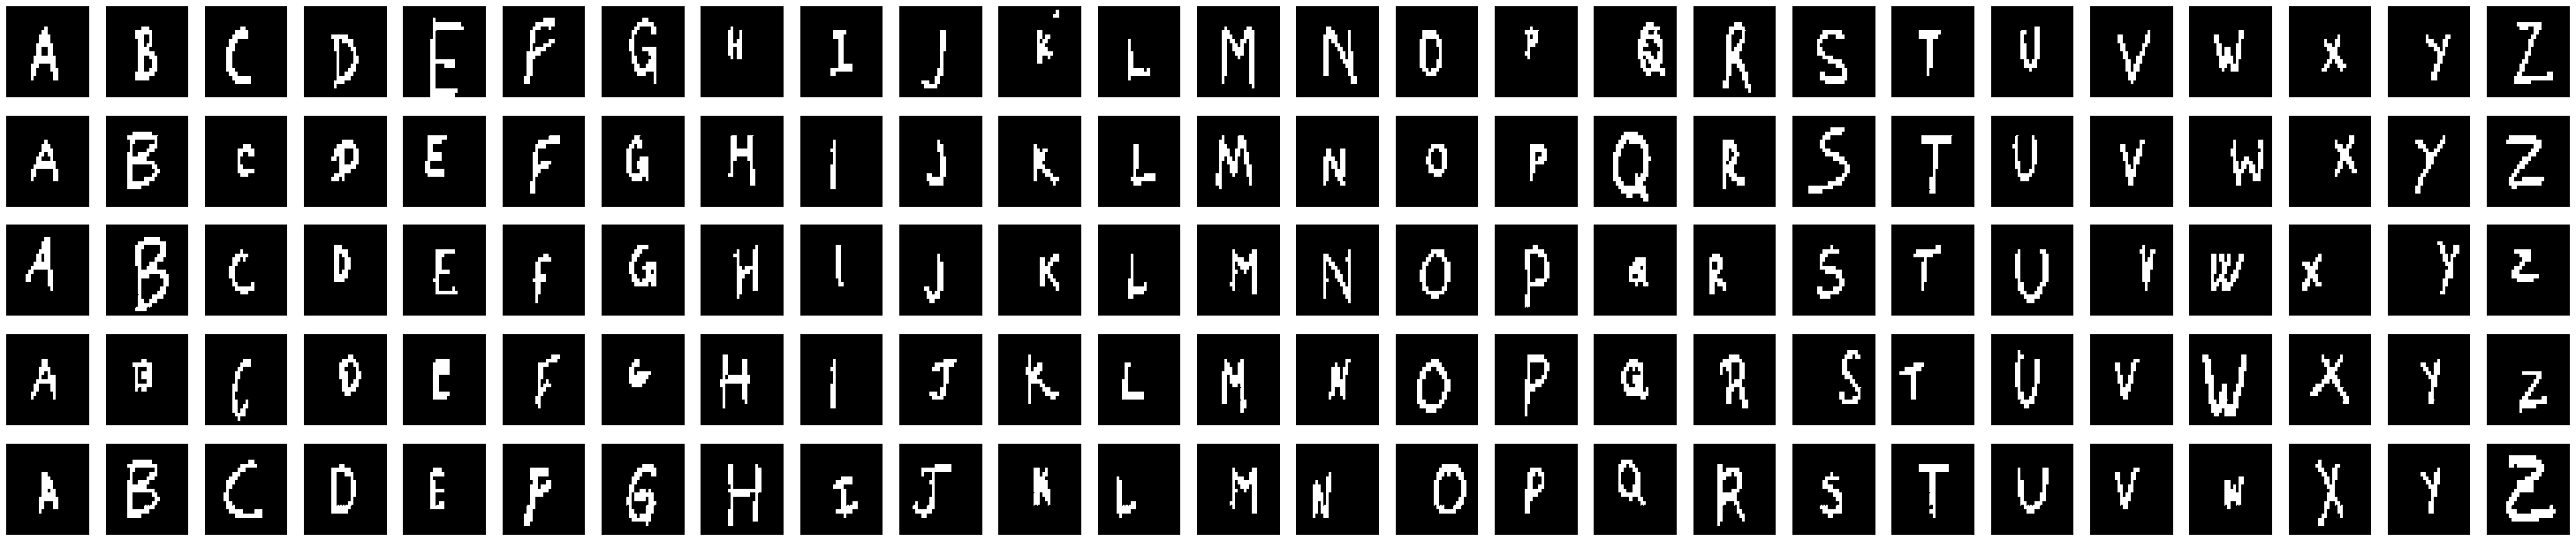

In [ ]:
sample_per_class = 5
figure = plt.figure(figsize=(nclasses*2,(1+sample_per_class*2)))

idx_cls = 0
for cls in classes:
  idxs = np.flatnonzero(y == cls)
  idxs = np.random.choice(idxs, sample_per_class, replace=False)
  i = 0
  for idx in idxs:
    plt_idx = i * nclasses + idx_cls + 1
    p = plt.subplot(sample_per_class, nclasses, plt_idx);
    p = sns.heatmap(np.reshape(X[idx], (22,30)), cmap=plt.cm.gray, 
             xticklabels=False, yticklabels=False, cbar=False);
    p = plt.axis('off');
    i += 1
  idx_cls += 1

In [ ]:
print(len(X))
print(len(X[0]))


14300
660


In [ ]:
print(X[0])
print(y[0])

[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0. 255. 255. 255. 255. 255. 255. 255. 255.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0. 255. 255. 255. 255. 255. 255. 255. 255.
 255.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0. 255. 255.   0.   0.   0.   0.
   0. 

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0,train_size=7500,test_size=2500)
X_train_scaled=X_train/255.0
X_test_scaled =X_test/255.0


In [ ]:
clf=LogisticRegression(solver='saga',multi_class='multinomial').fit(X_train_scaled,y_train)


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


In [ ]:
y_pred=clf.predict(X_test_scaled)
accuracy=accuracy_score(y_test,y_pred)
print(accuracy*100)

99.2


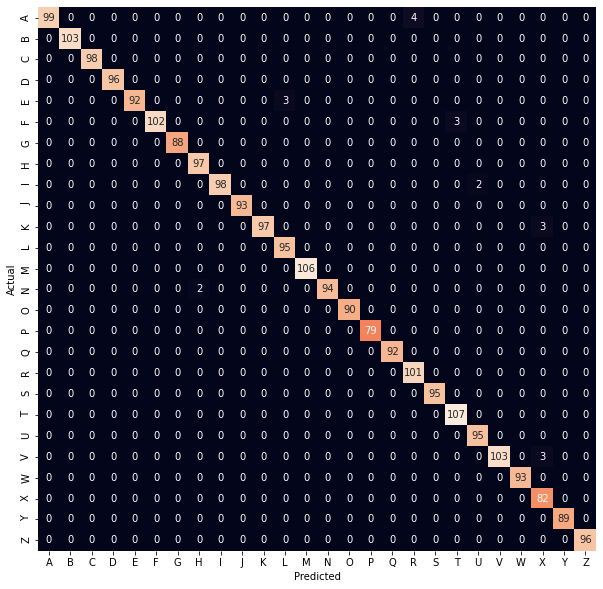

In [ ]:
cm=pd.crosstab(y_test,y_pred,rownames=['Actual'],colnames=['Predicted'])
p=plt.figure(figsize=(10,10))
p=sns.heatmap(cm,annot=True,fmt="d",cbar=False)